In [1]:
from tqdm import tqdm
import CLAMS as clams
import numpy as np
import json
from competitors import *

with open("../scatterplots/sampling/sampled_datasets.json", "r") as f:
	sampled_datasets = json.load(f)

In [ ]:


cs = clams.ClusterAmbiguity()
amb_list = []
for i, dataset in tqdm(enumerate(sampled_datasets)):
	splot = np.load(f"../scatterplots/scatterplots/{dataset}")
	try:
		ambiguity = cs.fit(splot)
		amb_list.append(ambiguity)
	except:
		amb_list.append(None)

amb_list = np.array(amb_list)
np.save("../scatterplots/sampling/ambiguity.npy", amb_list)

In [2]:
xmeans_ambiguity_score = []
hdbscan_ambiguity_score = []
dbscan_ambiguity_score = []
for i, dataset in tqdm(enumerate(sampled_datasets)):
	splot = np.load(f"../scatterplots/scatterplots/{dataset}")
	# xmeans_ambiguity_score.append(get_clustering_diff(xmeans_clusterer, adjusted_mutual_info_score, splot))
	hdbscan_ambiguity_score.append(get_clustering_diff(hdbscan_clusterer, adjusted_mutual_info_score, splot))
	dbscan_ambiguity_score.append(get_clustering_diff(dbscan_clusterer, adjusted_mutual_info_score, splot))

# xmeans_ambiguity_socre = np.array(xmeans_ambiguity_score)
# np.save("../scatterplots/sampling/xmeans_ambiguity.npy", xmeans_ambiguity_score)

hdbscan_ambiguity_score = np.array(hdbscan_ambiguity_score)
np.save("../scatterplots/sampling/hdbscan_ambiguity.npy", hdbscan_ambiguity_score)
dbscan_ambiguity_score = np.array(dbscan_ambiguity_score)
np.save("../scatterplots/sampling/dbscan_ambiguity.npy", dbscan_ambiguity_score)

9it [00:17,  1.25s/it]

In [4]:
removing_list = [
	"hepatitis_tsne_17", "spectf_heart_tsne_1", "world12d_densmap_5", "ph_recognition_isomap_14", "dermatology_isomap_18", "statlog_image_segmentation_lle_5", "statlog_image_segmentation_umap_2", "human_stress_detection_tsne_17",
	"magic_gamma_telescope_rp_0", "human_stress_detection_tsne_9", "turkish_music_emotion_densmap_13", "fashion_mnist_rp_3", "classification_in_asteroseismology_tsne_15", "imdb_lle_1", "classification_in_asteroseismology_tsne_2",
	"smoker_condition_densmap_17", "fraud_detection_bank_isomap_8", "spambase_lle_3", "credit_risk_classification_lle_8", "diabetic_retinopathy_debrecen_isomap_4", "diabetic_retinopathy_debrecen_rp_7", "imdb_isomap_1", "spambase_lle_0",
	"optical_recognition_of_handwritten_digits_densmap_11", "spectf_heart_tsne_4", "predicting_pulsar_star_umap_9", "microbes_tsne_7", "magic_gamma_telescope_umap_1", "raisin_tsne_5", "diabetic_retinopathy_debrecen_lle_18",
	"predicting_pulsar_star_tsne_6", "htru2_tsne_9", "siberian_weather_stats_umap_2", "taiwanese_bankruptcy_prediction_umap_7", "optical_recognition_of_handwritten_digits_densmap_5", "banknote_authentication_rp_0", "iris_tsne_4", 
	"epileptic_seizure_recognition_lle_5", "credit_risk_classification_umap_11", "fashion_mnist_densmap_2", "taiwanese_bankruptcy_prediction_umap_17", "fashion_mnist_umap_14", "pen_based_recognition_of_handwritten_digits_umap_10",
	"pen_based_recognition_of_handwritten_digits_densmap_6", "fraud_detection_bank_densmap_7", "pen_based_recognition_of_handwritten_digits_umap_17"
]

training_list = [
	"dermatology_rp_11", "statlog_image_segmentation_tsne_2", "website_phishing_densmap_2", "ph_recognition_densmap_8"
]

In [5]:
amb_list = np.load("../scatterplots/sampling/ambiguity.npy", allow_pickle=True)
xmeans_amb_list = np.load("../scatterplots/sampling/xmeans_ambiguity.npy", allow_pickle=True)
hdbscan_amb_list = np.load("../scatterplots/sampling/hdbscan_ambiguity.npy", allow_pickle=True)
dbscan_amb_list = np.load("../scatterplots/sampling/dbscan_ambiguity.npy", allow_pickle=True)
with open("../scatterplots/sampling/sampled_datasets.json", "r") as f:
	sampled_datasets = np.array(json.load(f))

sampled_datasets = sampled_datasets[amb_list != None].tolist()
xmeans_amb_list = xmeans_amb_list[amb_list != None]
hdbscan_amb_list = hdbscan_amb_list[amb_list != None]
dbscan_amb_list = dbscan_amb_list[amb_list != None]
amb_list = amb_list[amb_list != None]

for dataset in removing_list:
	idx = sampled_datasets.index(dataset + ".npy")
	amb_list = np.delete(amb_list, idx)
	xmeans_amb_list = np.delete(xmeans_amb_list, idx)
	hdbscan_amb_list = np.delete(hdbscan_amb_list, idx)
	dbscan_amb_list = np.delete(dbscan_amb_list, idx)
	sampled_datasets.remove(dataset + ".npy")

with open("../scatterplots/sampling/sampled_datasets_manual_sample.json", "w") as f:
	json.dump(sampled_datasets, f)

with open("../scatterplots/sampling/sampled_datasets_training.json", "w") as f:
	json.dump(training_list, f)

key_to_ambiguity = {}
key_to_xmeans_ambiguity = {}
key_to_hdbscan_ambiguity = {}
key_to_dbscan_ambiguity = {}
for i, dataset in enumerate(sampled_datasets):
	key_to_ambiguity[dataset] = amb_list[i]
	key_to_xmeans_ambiguity[dataset] = xmeans_amb_list[i]
	key_to_hdbscan_ambiguity[dataset] = hdbscan_amb_list[i]
	key_to_dbscan_ambiguity[dataset] = dbscan_amb_list[i]


with open("../scatterplots/sampling/key_to_ambiguity.json", "w") as f:
	json.dump(key_to_ambiguity, f)

with open("../scatterplots/sampling/key_to_xmeans_ambiguity.json", "w") as f:
	json.dump(key_to_xmeans_ambiguity, f)

with open("../scatterplots/sampling/key_to_hdbscan_ambiguity.json", "w") as f:
	json.dump(key_to_hdbscan_ambiguity, f)

with open("../scatterplots/sampling/key_to_dbscan_ambiguity.json", "w") as f:
	json.dump(key_to_dbscan_ambiguity, f)


['heart_attack_analysis_prediction_dataset_lle_7.npy', 'breast_cancer_wisconsin_original_rp_3.npy', 'yeast_tsne_2.npy', 'iris_umap_6.npy', 'dermatology_rp_11.npy', 'rice_seed_gonen_jasmine_rp_8.npy', 'wine_customer_isomap_10.npy', 'rice_seed_gonen_jasmine_lle_16.npy', 'rice_seed_gonen_jasmine_rp_10.npy', 'htru2_rp_5.npy', 'dermatology_isomap_5.npy', 'website_phishing_isomap_19.npy', 'wireless_indoor_localization_lle_14.npy', 'dry_bean_densmap_15.npy', 'raisin_umato_5.npy', 'insurance_company_benchmark_densmap_9.npy', 'diabetic_retinopathy_debrecen_densmap_10.npy', 'fashion_mnist_densmap_0.npy', 'ph_recognition_densmap_10.npy', 'website_phishing_densmap_2.npy', 'classification_in_asteroseismology_densmap_5.npy', 'diabetic_retinopathy_debrecen_lle_13.npy', 'statlog_image_segmentation_tsne_13.npy', 'seismic_bumps_lle_12.npy', 'statlog_german_credit_tsne_10.npy', 'optical_recognition_of_handwritten_digits_umap_0.npy', 'weather_densmap_2.npy', 'statlog_image_segmentation_tsne_2.npy', 'coil2

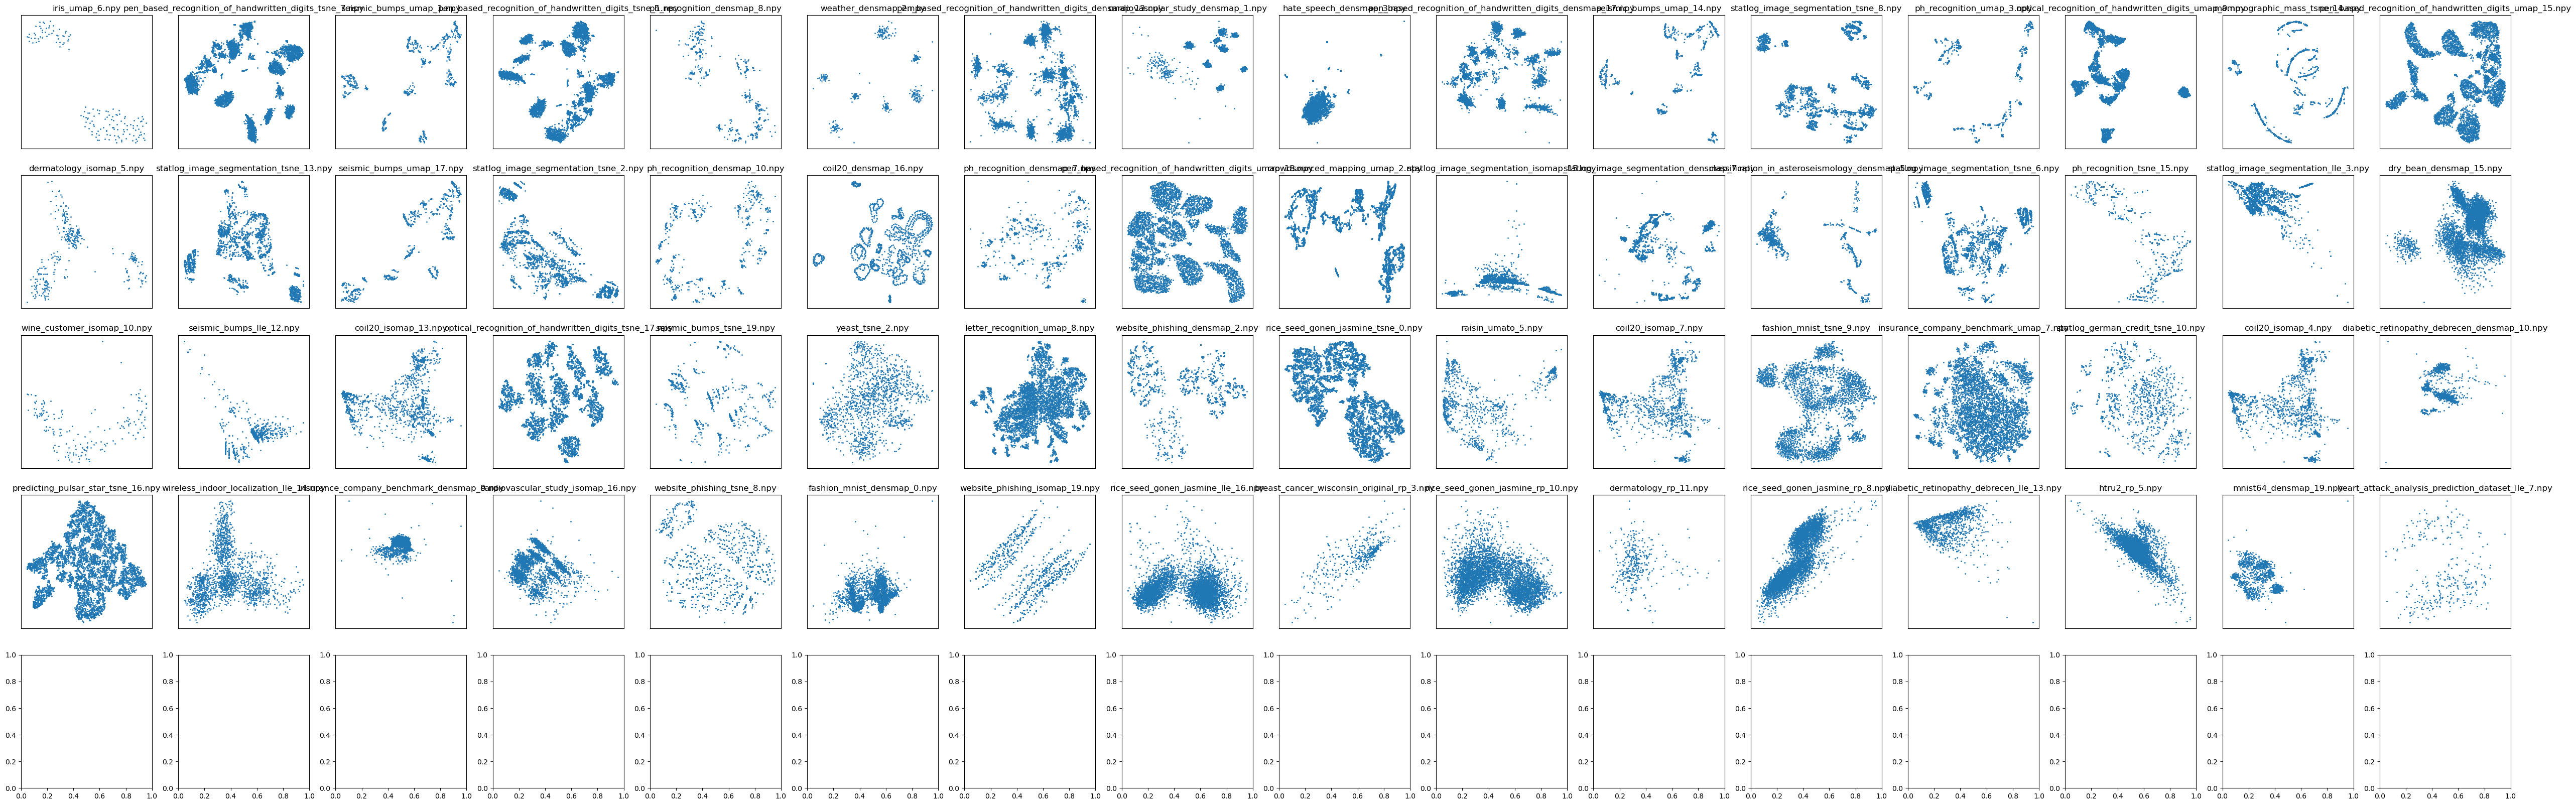

<Figure size 640x480 with 0 Axes>

In [25]:
## visualize in the order of ambiguity
import matplotlib.pyplot as plt

print(sampled_datasets)
sampled_datasets = np.array(sampled_datasets)


## sort based on ambiguity
sampled_datasets = sampled_datasets[np.argsort(amb_list)]
amb_list = np.sort(amb_list)

num_row = len(sampled_datasets) // 16 + 1
num_col = 16

fig, axs = plt.subplots(num_row, num_col, figsize=(4 * num_col, 4 * num_row))
for i, dataset in enumerate(sampled_datasets):
	splot = np.load(f"../scatterplots/scatterplots/{dataset}")
	axs[i // num_col, i % num_col].scatter(splot[:, 0], splot[:, 1], s=1)
	## remove ticks
	axs[i // num_col, i % num_col].set_xticks([])
	axs[i // num_col, i % num_col].set_yticks([])

	axs[i // num_col, i % num_col].set_title(f"{dataset}")

	with open(f"../scatterplots/sampling/data/{dataset}.json", "w") as f:
		json.dump(splot.tolist(), f)


plt.savefig("../scatterplots/sampling/sampled_scatterplots_amb_ordered.png", dpi=500)
plt.show()
plt.clf()


In [ ]:
## get sample for training